In [1]:
# Importing necessary libraries again
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to generate the Swiss roll
def generate_swiss_roll(N_t, N_w, t_min=0, t_max=10, w_min=-1, w_max=1, omega=1):
    t = np.linspace(t_min, t_max, N_t)
    w = np.linspace(w_min, w_max, N_w)
    t, w = np.meshgrid(t, w)
    t = t.flatten()
    w = w.flatten()
    x = t * np.cos(omega * t)
    y = w
    z = t * np.sin(omega * t)
    X = np.column_stack((x, y, z))
    return X

# Function to generate the Swiss roll
def generate_swiss_roll_rand(N, t_min=0, t_max=10, w_min=-1, w_max=1, omega=1, seed=42):
    np.random.seed(seed)
    # t = np.random.uniform(t_min, t_max, N_t)
    # w = np.random.uniform(w_min, w_max, N_w)
    # t, w = np.meshgrid(t, w)
    # t = t.flatten()
    # w = w.flatten()
    tw = np.random.uniform([0, w_min], [np.square(t_max - t_min), w_max], [N, 2])
    tw[:, 0] = np.sqrt(tw[:, 0]) + t_min
    t, w = tw[:, 0], tw[:, 1]
    x = t * np.cos(omega * t)
    y = w
    z = t * np.sin(omega * t)
    X = np.column_stack((x, y, z))
    return X


def make_hole(X, hole_center, hole_radius):
    # Remove points that are within `hole_radius` of the hole_center
    distances_from_center = np.linalg.norm(X - hole_center, axis=1)
    X = X[distances_from_center > hole_radius]
    return X

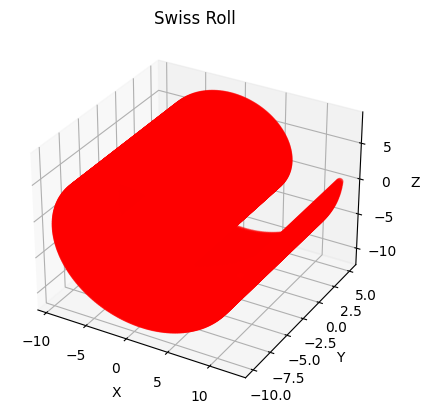

In [28]:
# Generate Swiss roll data
# X = generate_swiss_roll(N_t=40, N_w=10, t_min=0, t_max=4, w_min=0, w_max=4, omega=2)
X = generate_swiss_roll(N_t=50, N_w=10, t_min=0, t_max=4 * np.pi, w_min=-10, w_max=5, omega=1)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c='r', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Swiss Roll')
plt.show()

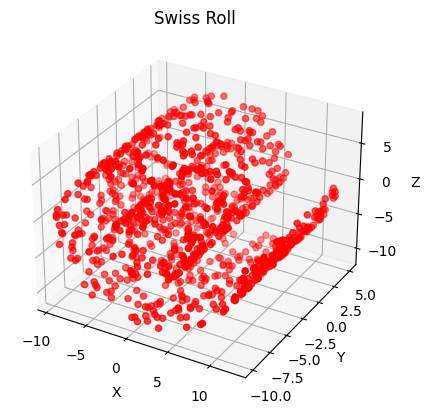

In [55]:
# Generate Swiss roll data
# X = generate_swiss_roll(N_t=40, N_w=10, t_min=0, t_max=4, w_min=0, w_max=4, omega=2)
X = generate_swiss_roll_rand(N=1000, t_min=0, t_max=4 * np.pi, w_min=-10, w_max=5, omega=1)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c='r', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Swiss Roll')
plt.show()

In [56]:
# X = generate_swiss_roll(N_t=100, N_w=20, t_min=0, t_max=4 * np.pi, w_min=-10, w_max=5, omega=1)

omega=1
t = 3 * np.pi
w = -3
hole_center = [t * np.cos(omega * t), w, t * np.sin(omega * t)]
Y = make_hole(X, hole_center, 3)
# t = 3 * np.pi
# w = 1
# hole_center = [t * np.cos(omega * t), w, t * np.sin(omega * t)]
# Y = make_hole(Y, hole_center, 6)
# t = 0.5 * np.pi
# w = -1
# hole_center = [t * np.cos(omega * t), w, t * np.sin(omega * t)]
# Y = make_hole(Y, hole_center, 4)
# t = 1 * np.pi
# w = 2
# hole_center = [t * np.cos(omega * t), w, t * np.sin(omega * t)]
# Y = make_hole(Y, hole_center, 4)

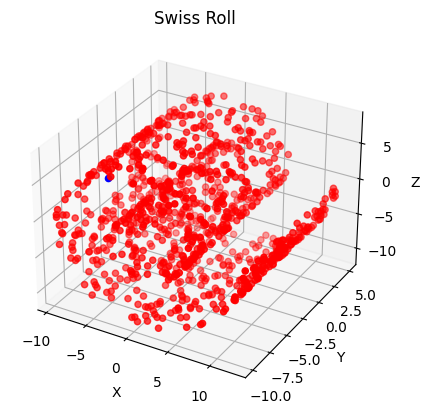

In [57]:
# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Y[:, 0], Y[:, 1], Y[:, 2], c='r', marker='o')
ax.scatter(*hole_center, c='b', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Swiss Roll')
plt.show()

In [64]:
np.savetxt("swiss_roll.txt", X)
np.savetxt("swiss_roll_hole.txt", Y)

In [62]:
Y.shape

(979, 3)

In [63]:
X.shape

(1000, 3)